In [286]:
import MetaTrader5 as mt5
from datetime import datetime
import pandas as pd
import pytz

def baixa_cotacao(ticker):
    timezone = pytz.timezone("Etc/UTC")
    utc_from = datetime(2019, 12, 31, tzinfo=timezone)# data até a qual quer extrarir dados 
    rates = mt5.copy_rates_from(ticker, mt5.TIMEFRAME_D1, utc_from, 3500) #numero de velas até o dia 
    dados = pd.DataFrame(rates)
    dados['time']=pd.to_datetime(dados['time'], unit='s')
    dados = dados.set_index('time')
    dados = dados[['open', 'high', 'low', 'close', 'real_volume']]    
    return dados

def concatenate(empresas):
    #downloading data
    dic = {}
    dic_secundario = {}
    #lista que deu certo
    prim = []
    for i in empresas:
        try:
            download = baixa_cotacao(i)
            if len(download) >= 300:
                dic[i] = download
                #print(f'{i} -> primario')
                prim.append(i)

            else:
                dic_secundario = download
                print(f'{i} -> secundario')
        except:
            print(f'algum erro com: {i}')
    #concatenating        
    conc = False
    for k,v in dic.items():
        if not conc:
            data = dic[k]
            conc = True
        else:
            data = pd.concat([data,dic[k]],axis=1,join='outer')
    #changing columns names    
    colm = [] 
    for i in prim:
        colm.append(['open '+i])
        colm.append(['high '+i])
        colm.append(['low '+i])
        colm.append(['close '+i])
        colm.append(['volume '+i])        
        
    flatList = [ item for elem in colm for item in elem]
    data.columns = flatList
    
    return data

In [287]:
empresas = ['IBOV','ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 'BPAC11', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENGI11', 'EQTL3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4', 'GOLL4', 'HAPV3', 'HGTX3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'LAME4', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3', 'SULA11', 'SUZB3', 'TAEE11', 'TIMP3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIVT4', 'VVAR3', 'WEGE3', 'YDUQ3']

In [288]:
mt5.initialize()

True

In [289]:
dados = concatenate(empresas)

PCAR3 -> secundario


In [290]:
dados.iloc[2000:2008,:15]


,open IBOV,high IBOV,low IBOV,close IBOV,volume IBOV,open ABEV3,high ABEV3,low ABEV3,close ABEV3,volume ABEV3,open AZUL4,high AZUL4,low AZUL4,close AZUL4,volume AZUL4
time,,,,,,,,,,,,,,,
2016-12-09,60688.0,61129.0,60316.0,60501.0,6305992697,15.12,15.36,15.01,15.21,14663500.0,NaN,NaN,NaN,NaN,NaN
2016-12-12,60365.0,60380.0,59035.0,59179.0,5613357706,15.00,15.13,14.66,14.73,12483300.0,NaN,NaN,NaN,NaN,NaN
2016-12-13,59178.0,59946.0,58758.0,59281.0,6366299792,14.77,14.95,14.65,14.89,19703600.0,NaN,NaN,NaN,NaN,NaN
2016-12-14,59276.0,59338.0,58212.0,58212.0,6766281516,14.89,15.06,14.64,14.78,20370100.0,NaN,NaN,NaN,NaN,NaN
2016-12-15,58214.0,58635.0,57575.0,58396.0,6170581498,14.72,15.11,14.65,14.92,15837600.0,NaN,NaN,NaN,NaN,NaN
2016-12-16,58398.0,59312.0,58365.0,58389.0,6580141441,14.99,15.28,14.94,15.25,23240300.0,NaN,NaN,NaN,NaN,NaN
2016-12-19,58396.0,58600.0,57109.0,57111.0,5827169046,15.18,15.32,14.89,14.90,13277100.0,NaN,NaN,NaN,NaN,NaN
2016-12-20,57121.0,57918.0,57038.0,57583.0,4815966363,14.95,15.11,14.71,15.00,13460100.0,NaN,NaN,NaN,NaN,NaN


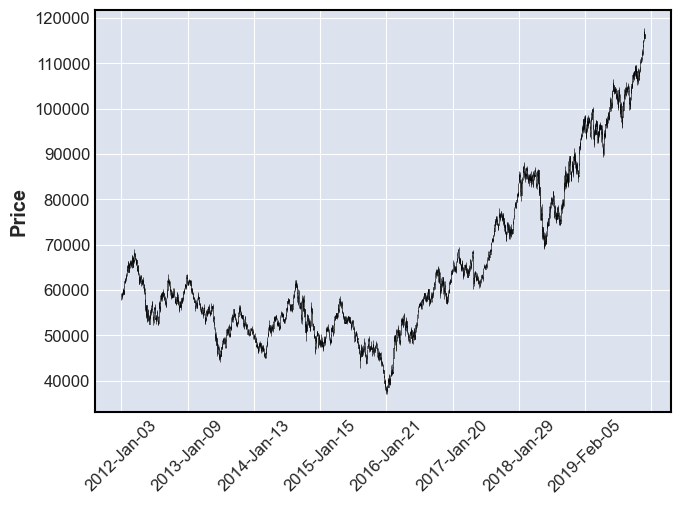

In [291]:
import mplfinance as mpf

dados = dados.iloc[779:,:]


filter_col = [col for col in dados if col.endswith('IBOV')]
ibov = dados[filter_col].copy()

ibov.columns = ['open','high', 'low','close','volume']

mpf.plot(ibov,type='candle')

In [292]:
ibov

,open,high,low,close,volume
time,,,,,
2012-01-03,57836.0,59288.0,57836.0,59265.0,5141087504
2012-01-04,59263.0,59519.0,58558.0,59365.0,4225085200
2012-01-05,59354.0,59354.0,57963.0,58546.0,4474779809
2012-01-06,58565.0,59261.0,58355.0,58600.0,3894106322
2012-01-09,58601.0,59220.0,58599.0,59083.0,3634138430
...,...,...,...,...,...
2019-12-20,115133.0,115171.0,114526.0,115121.0,19523168270
2019-12-23,115119.0,115863.0,114964.0,115863.0,22090199006
2019-12-26,115864.0,117220.0,115673.0,117203.0,10548606323


In [293]:
filter_col = [col for col in dados if col.startswith('close')]
data = dados[filter_col].copy()
data

,close IBOV,close ABEV3,close AZUL4,close B3SA3,close BBAS3,close BBDC3,close BBDC4,close BBSE3,close BEEF3,close BPAC11,...,close TAEE11,close TIMP3,close TOTS3,close UGPA3,close USIM5,close VALE3,close VIVT4,close VVAR3,close WEGE3,close YDUQ3
time,,,,,,,,,,,,,,,,,,,,,
2012-01-03,59265.0,10.45,NaN,7.31,14.71,8.05,9.69,NaN,4.87,NaN,...,NaN,7.86,9.58,13.35,10.16,31.02,29.33,NaN,4.67,4.53
2012-01-04,59365.0,10.09,NaN,7.44,14.64,8.05,9.71,NaN,4.82,NaN,...,NaN,7.99,9.38,13.70,9.94,31.23,29.22,NaN,4.70,4.53
2012-01-05,58546.0,10.00,NaN,7.36,14.48,7.99,9.65,NaN,4.70,NaN,...,NaN,7.96,8.98,13.60,9.76,30.40,28.91,NaN,4.73,4.29
2012-01-06,58600.0,10.02,NaN,7.47,14.12,8.11,9.77,NaN,4.68,NaN,...,NaN,7.81,8.72,13.49,9.76,30.14,28.37,NaN,4.67,4.46
2012-01-09,59083.0,9.97,NaN,7.59,14.23,8.15,9.79,NaN,4.72,NaN,...,NaN,7.96,8.85,13.74,9.94,30.10,28.36,NaN,4.67,4.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,115121.0,18.91,57.00,47.96,50.45,30.09,32.23,34.54,12.08,75.05,...,29.52,15.20,22.70,24.30,9.24,53.59,55.25,11.37,33.69,47.23
2019-12-23,115863.0,18.96,57.60,45.78,51.98,30.70,32.43,34.73,12.07,74.28,...,29.71,15.31,22.44,25.01,9.44,53.38,55.74,11.67,33.63,48.09
2019-12-26,117203.0,19.22,57.07,45.57,52.57,31.02,32.83,34.56,12.64,74.65,...,30.05,15.51,22.28,25.28,9.44,53.59,56.23,11.80,34.68,47.70


In [294]:
data.to_excel('dados_relatorio.xlsx')
data

,close IBOV,close ABEV3,close AZUL4,close B3SA3,close BBAS3,close BBDC3,close BBDC4,close BBSE3,close BEEF3,close BPAC11,...,close TAEE11,close TIMP3,close TOTS3,close UGPA3,close USIM5,close VALE3,close VIVT4,close VVAR3,close WEGE3,close YDUQ3
time,,,,,,,,,,,,,,,,,,,,,
2012-01-03,59265.0,10.45,NaN,7.31,14.71,8.05,9.69,NaN,4.87,NaN,...,NaN,7.86,9.58,13.35,10.16,31.02,29.33,NaN,4.67,4.53
2012-01-04,59365.0,10.09,NaN,7.44,14.64,8.05,9.71,NaN,4.82,NaN,...,NaN,7.99,9.38,13.70,9.94,31.23,29.22,NaN,4.70,4.53
2012-01-05,58546.0,10.00,NaN,7.36,14.48,7.99,9.65,NaN,4.70,NaN,...,NaN,7.96,8.98,13.60,9.76,30.40,28.91,NaN,4.73,4.29
2012-01-06,58600.0,10.02,NaN,7.47,14.12,8.11,9.77,NaN,4.68,NaN,...,NaN,7.81,8.72,13.49,9.76,30.14,28.37,NaN,4.67,4.46
2012-01-09,59083.0,9.97,NaN,7.59,14.23,8.15,9.79,NaN,4.72,NaN,...,NaN,7.96,8.85,13.74,9.94,30.10,28.36,NaN,4.67,4.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,115121.0,18.91,57.00,47.96,50.45,30.09,32.23,34.54,12.08,75.05,...,29.52,15.20,22.70,24.30,9.24,53.59,55.25,11.37,33.69,47.23
2019-12-23,115863.0,18.96,57.60,45.78,51.98,30.70,32.43,34.73,12.07,74.28,...,29.71,15.31,22.44,25.01,9.44,53.38,55.74,11.67,33.63,48.09
2019-12-26,117203.0,19.22,57.07,45.57,52.57,31.02,32.83,34.56,12.64,74.65,...,30.05,15.51,22.28,25.28,9.44,53.59,56.23,11.80,34.68,47.70


In [295]:
import numpy as np
a = np.sum(data.isnull())

In [296]:
for k,v in a.items():
    if v>100:
        print(k,v)

close AZUL4 1304
close BBSE3 327
close BPAC11 1290
close BRDT3 1473
close CRFB3 1372
close CVCB3 494
close ENGI11 600
close GNDI3 1557
close HAPV3 1559
close IRBR3 1379
close KLBN11 496
close TAEE11 108
close VVAR3 709
